# Covid Supermarket Model

This notebook can be used to interact with the model and for analyzing the results

In [10]:
# import all necessary packages
import time
import matplotlib.pyplot as plt
%matplotlib inline
from model import CovidSupermarketModel
import core

### Set up variables for model

In [11]:
N_customers = 100
vaccination_prop = 0.1
avoid_radius = 3
len_shoplist = 10

n_steps = 100

# load supermarket floorplan for simulation
floorplan = core.load_floorplan("data/albert_excel_test.csv")
width = len(floorplan)
height = len(floorplan[0])

### Run the model

In [12]:
time_start = time.time()
model = CovidSupermarketModel(floorplan, width, height, N_customers, vaccination_prop, avoid_radius, len_shoplist)
model.run_model(n_steps)
print("Total simulation time: {:.2f}s".format(time.time()-time_start))


Trying to find route from (13, 36) to (16, 47)
Trying to find route from (17, 13) to (21, 11)
Trying to find route from (37, 3) to (16, 8)
Trying to find route from (50, 37) to (60, 38)
Trying to find route from (27, 58) to (59, 54)
Trying to find route from (32, 22) to (29, 8)
Trying to find route from (23, 47) to (41, 53)
Trying to find route from (37, 26) to (43, 58)
Trying to find route from (18, 14) to (22, 8)
Trying to find route from (29, 12) to (21, 9)
Trying to find route from (49, 38) to (61, 52)
Trying to find route from (53, 15) to (58, 12)
Trying to find route from (63, 2) to (37, 9)
Trying to find route from (42, 7) to (19, 5)
Trying to find route from (16, 11) to (24, 12)
Trying to find route from (16, 14) to (9, 50)
Trying to find route from (32, 54) to (57, 58)
Trying to find route from (13, 57) to (67, 30)
Trying to find route from (19, 14) to (5, 26)
Trying to find route from (69, 13) to (19, 17)
Trying to find route from (54, 27) to (56, 47)
Trying to find route fro

Trying to find route from (16, 47) to (60, 37)
Trying to find route from (47, 59) to (66, 50)
Trying to find route from (61, 52) to (41, 58)
Trying to find route from (2, 26) to (2, 20)
Trying to find route from (5, 26) to (33, 25)
Total time last step: 0.046079s
Trying to find route from (19, 4) to (43, 58)
Trying to find route from (8, 15) to (5, 26)
Trying to find route from (59, 58) to (57, 44)
Trying to find route from (46, 58) to (58, 50)
Trying to find route from (11, 13) to (2, 39)
Trying to find route from (58, 53) to (55, 53)
Total time last step: 0.061731s
Trying to find route from (8, 50) to (59, 27)
Trying to find route from (70, 16) to (5, 22)
Trying to find route from (46, 15) to (22, 17)
Trying to find route from (56, 47) to (41, 47)
Trying to find route from (57, 3) to (26, 20)
Trying to find route from (9, 34) to (53, 27)
Total time last step: 0.062164s
Trying to find route from (57, 58) to (67, 38)
Total time last step: 0.026592s
Total time last step: 0.024185s
Tryin

Trying to find route from (55, 12) to (50, 7)
Trying to find route from (12, 53) to (46, 58)
Trying to find route from (15, 41) to (27, 47)
Total time last step: 0.032822s
Trying to find route from (70, 16) to (58, 58)
Trying to find route from (53, 27) to (62, 29)
Total time last step: 0.036622s
Trying to find route from (60, 37) to (38, 50)
Trying to find route from (43, 47) to (16, 53)
Trying to find route from (22, 53) to (67, 47)
Trying to find route from (70, 13) to (2, 27)
Total time last step: 0.050744s
Trying to find route from (44, 47) to (7, 52)
Trying to find route from (70, 15) to (54, 3)
Total time last step: 0.031337s
Trying to find route from (61, 54) to (52, 38)
Total time last step: 0.026772s
Trying to find route from (70, 18) to (40, 3)
Trying to find route from (23, 17) to (29, 3)
Total time last step: 0.032384s
Trying to find route from (18, 50) to (55, 31)
Trying to find route from (50, 47) to (8, 53)
Trying to find route from (70, 19) to (25, 19)
Trying to find r

### Process results

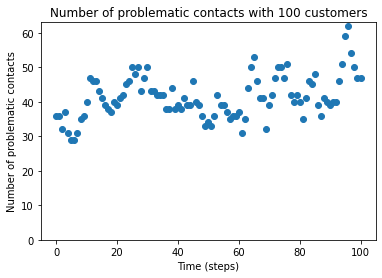

In [13]:
# collect data from model
model_data = model.datacollector.get_model_vars_dataframe()
# model_data.plot()

model_data = model_data.to_numpy().flatten()

plt.figure()
plt.title("Number of problematic contacts with {} customers".format(N_customers))
plt.scatter([i for i in range(len(model_data))], model_data)
plt.xlabel("Time (steps)")
plt.ylabel("Number of problematic contacts")
plt.ylim(0, max(model_data)+1)
plt.show()